https://github.com/mamintoosi/FS-in-Bio-Graphs

In [1]:
# Install required packages.
!pip install matplotlib_venn
!pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=29f48d40fb2c198de019e3486a809d68b4814db970d8006d34f9a4c55ac5785b
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


In [2]:
%matplotlib inline

In [3]:
!git clone https://github.com/mamintoosi/FS-in-Bio-Graphs.git

Cloning into 'FS-in-Bio-Graphs'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 180 (delta 26), reused 51 (delta 17), pack-reused 119
Receiving objects: 100% (180/180), 10.85 MiB | 37.78 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [4]:
%cd FS-in-Bio-Graphs/

/content/FS-in-Bio-Graphs


In [1]:
import pathlib
path = pathlib.Path('tmp')
path.mkdir(parents=True, exist_ok=True)

Table info:  (5392, 2)
Number of unique nodes (Plants) in main file:  3251


  0%|          | 0/1 [00:00<?, ?it/s]

Number of intersected Meabolites: 272


  0%|          | 0/6 [00:00<?, ?it/s]

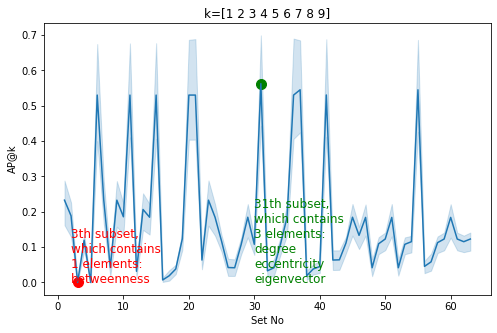

Wall time: 9min 34s


In [2]:
%%time
%matplotlib inline
%run src/main_features.py --dataset_name Stomach
plt.show()

Table info:  (5392, 2)
Number of unique nodes (Plants) in main file:  3251


  0%|          | 0/1 [00:00<?, ?it/s]

Number of intersected Meabolites: 324


  0%|          | 0/6 [00:00<?, ?it/s]

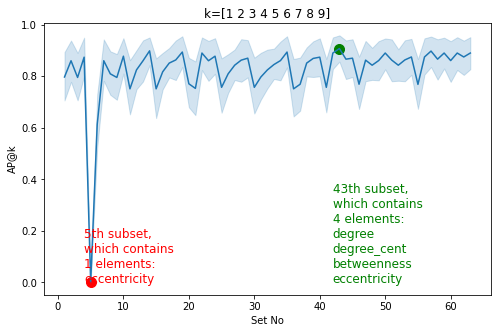

Wall time: 8min 30s


In [3]:
%%time
%matplotlib inline
%run src/main_features.py --dataset_name Breast
plt.show()